In [ ]:
!pip install -U scikit-learn
import pandas as pd
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
data = pd.read_csv('train.csv')


  Using cached scikit_learn-1.8.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
Using cached scikit_learn-1.8.0-cp311-cp311-macosx_12_0_arm64.whl (8.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.2
    Uninstalling scikit-learn-1.7.2:
      Successfully uninstalled scikit-learn-1.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-tabular 1.5.0 requires scikit-learn<1.8.0,>=1.4.0, but you have scikit-learn 1.8.0 which is incompatible.
autogluon-core 1.5.0 requires scikit-learn<1.8.0,>=1.4.0, but you have scikit-learn 1.8.0 which is incompatible.
autogluon-features 1.5.0 requires scikit-learn<1.8.0,>=1.4.0, but you have scikit-learn 1.8.0 which is incompatible.


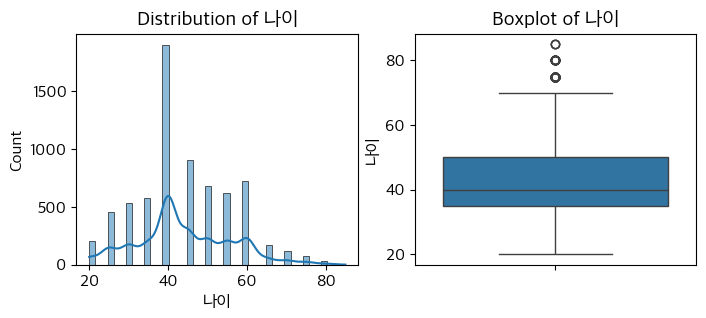

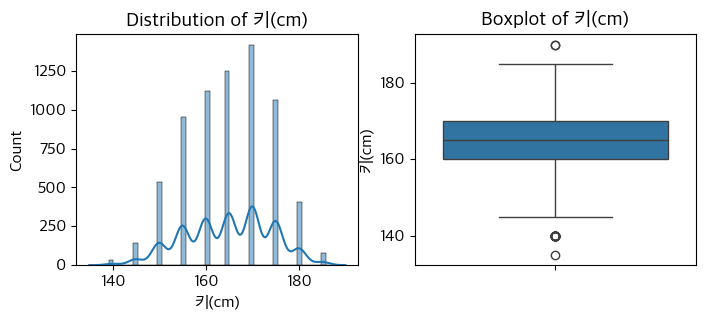

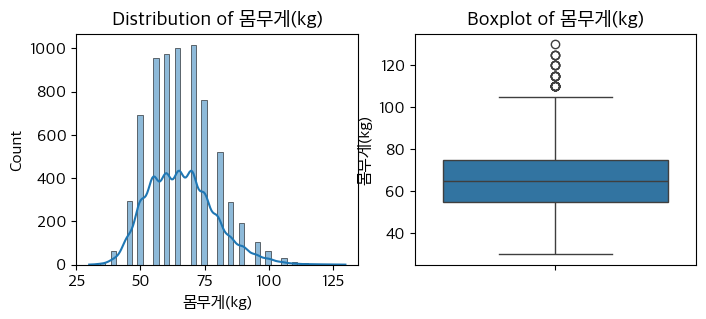

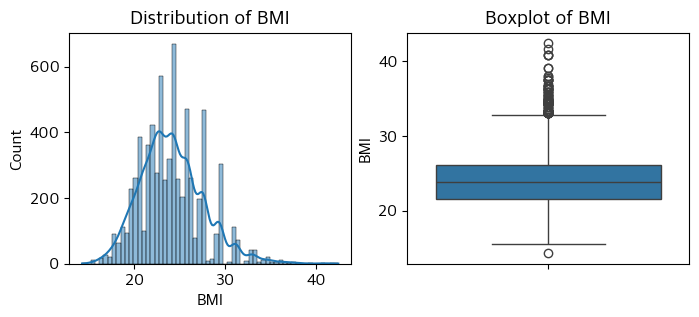

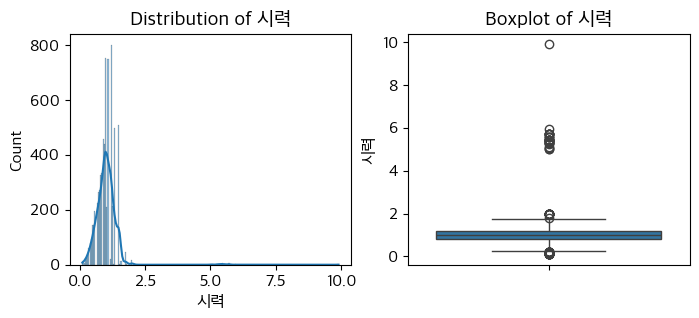

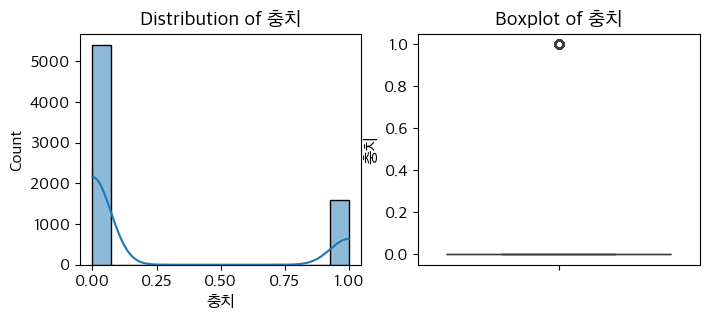

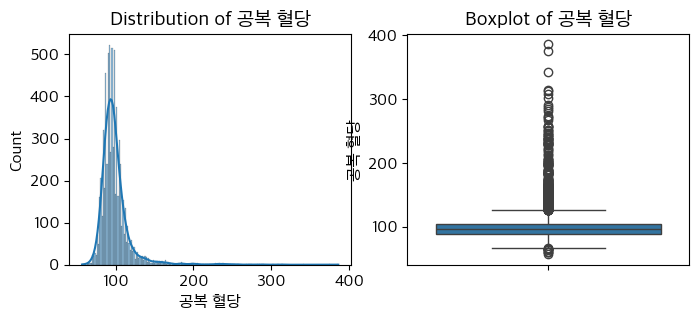

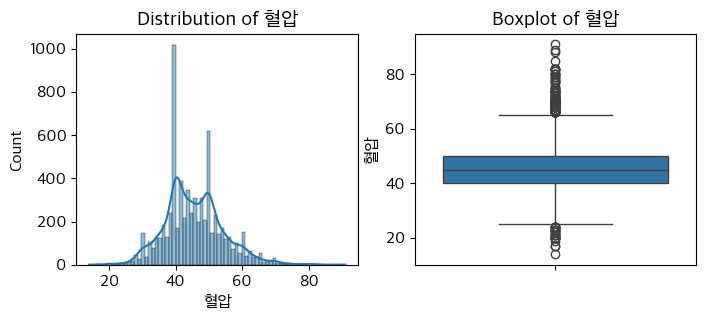

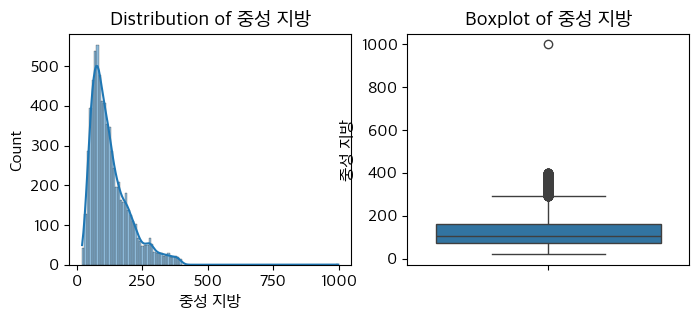

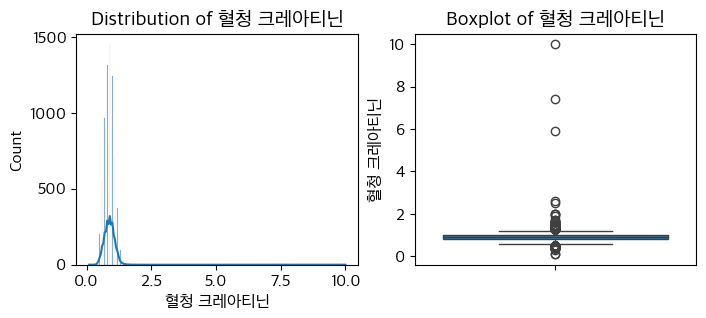

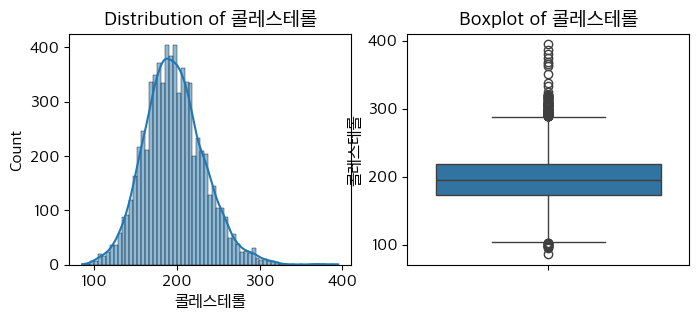

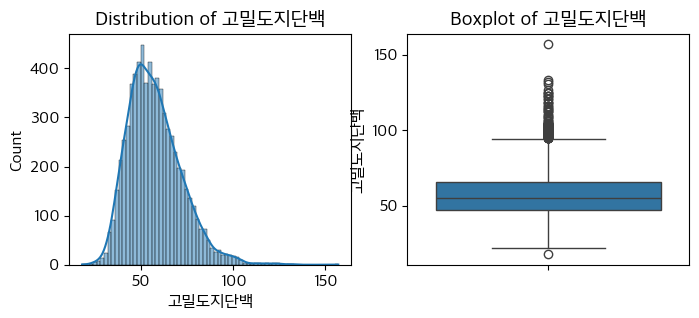

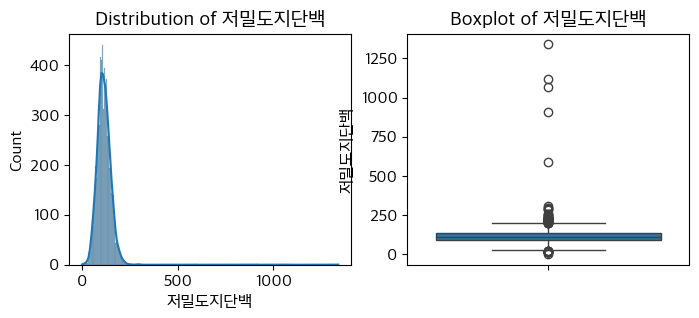

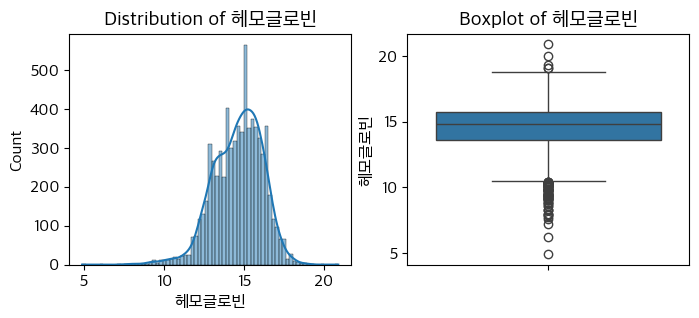

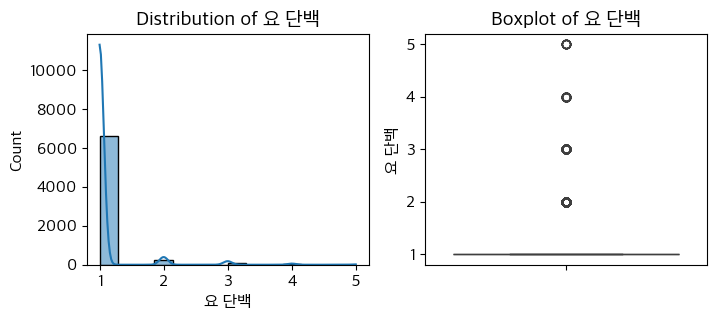

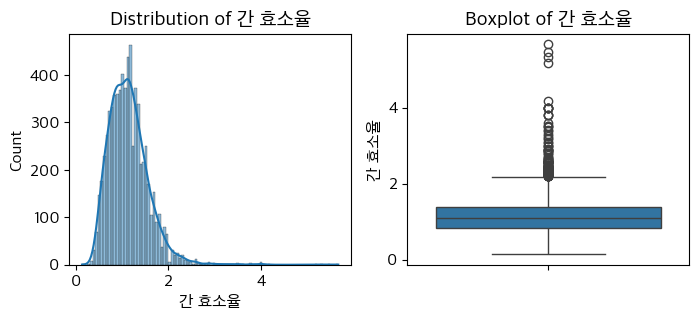

<Figure size 640x480 with 0 Axes>

In [11]:
!pip install matplotlib
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Apple SD Gothic Neo'   # 한글 폰트 세팅
plt.rcParams['font.size'] = 12    # 폰트 크기
plt.rcParams['axes.unicode_minus'] = False    # 유니코드가 '-'기호로 설정되는 폰트가 깨지는 것을 방지
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
train = data

# 수치형 변수 분포 확인
numerical_features = train.select_dtypes(include=[np.number]).columns.tolist()[:-1]

for feature in numerical_features:
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    sns.histplot(train[feature], kde=True)
    plt.title('Distribution of ' + feature)
    plt.subplot(1, 2, 2)
    sns.boxplot(y=train[feature])
    plt.title('Boxplot of ' + feature)
    plt.show()
    
plt.savefig(
    "yo.png",
    dpi=300,
    bbox_inches="tight"
    )

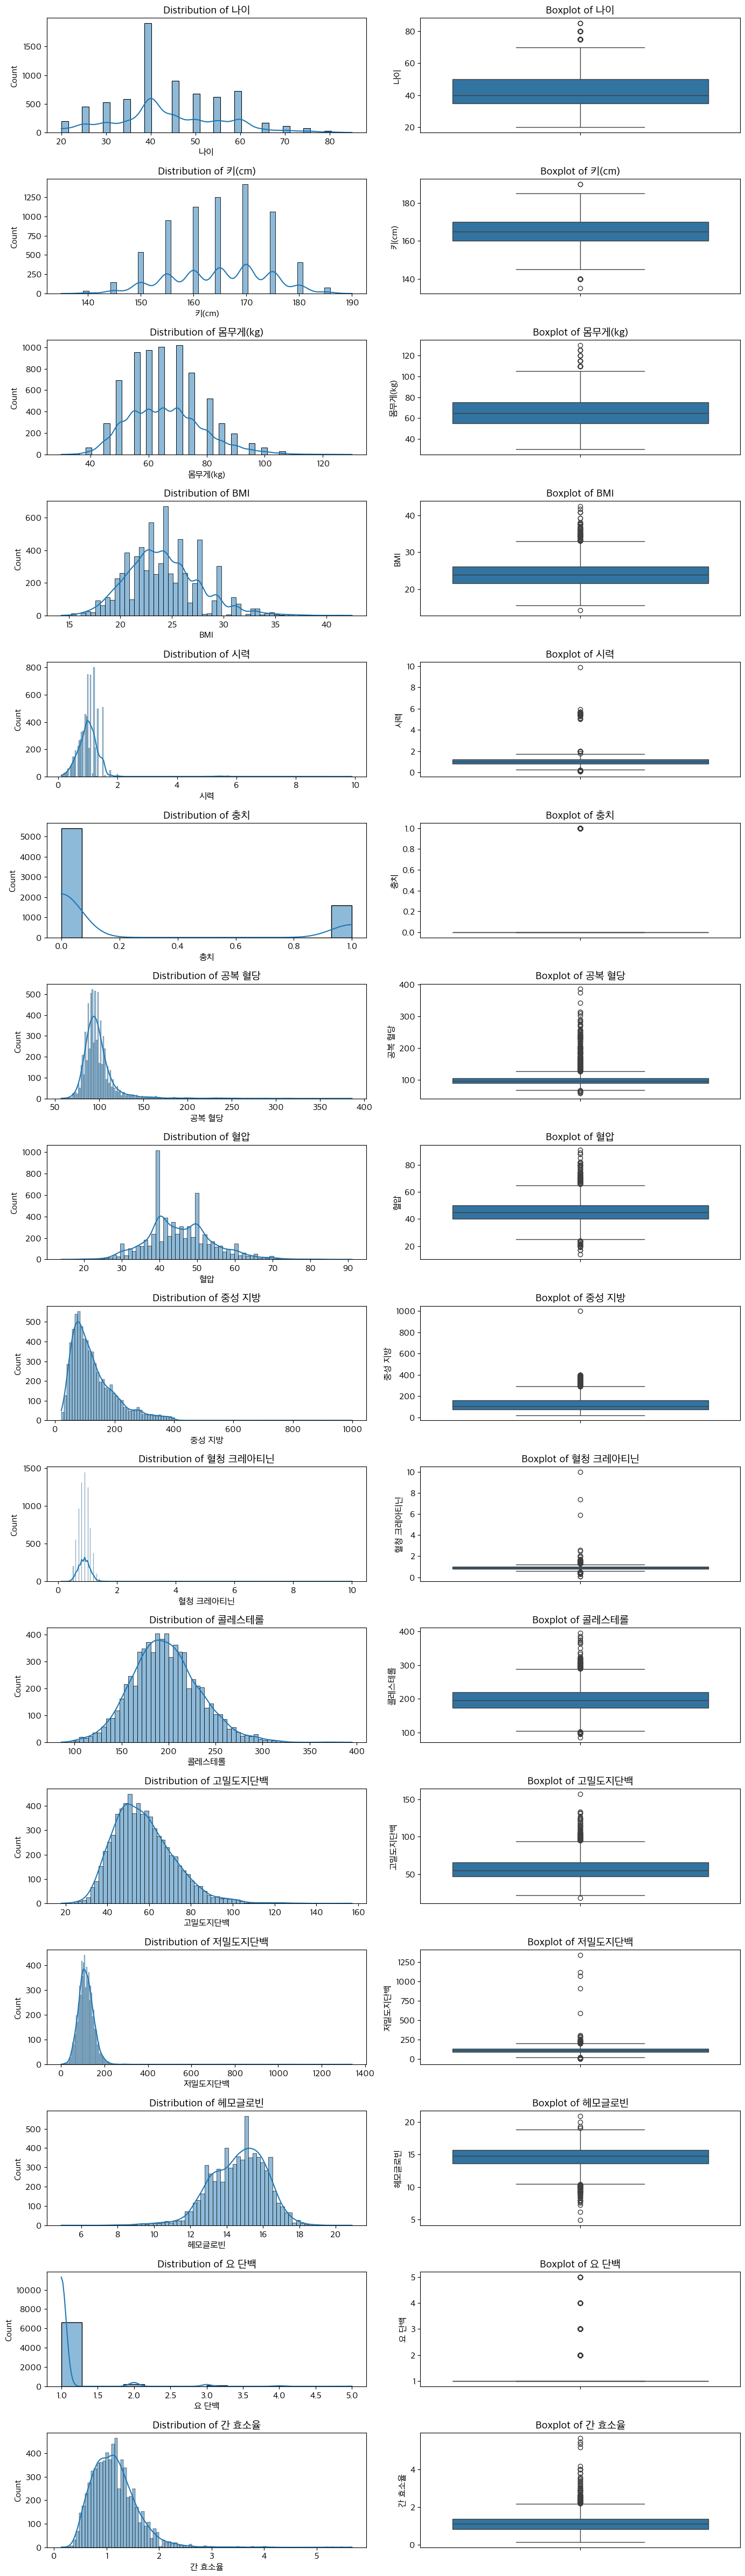

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train = data
numerical_features = train.select_dtypes(include=[np.number]).columns.tolist()[:-1]
n = len(numerical_features)

fig, axes = plt.subplots(n, 2, figsize=(14, 3*n))

for i, feature in enumerate(numerical_features):
    sns.histplot(train[feature].dropna(), kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribution of {feature}")

    sns.boxplot(y=train[feature].dropna(), ax=axes[i, 1])
    axes[i, 1].set_title(f"Boxplot of {feature}")

fig.tight_layout()
fig.savefig("yo.png", dpi=300, bbox_inches="tight")
plt.show()


In [2]:
columns_num = len(data.columns)
data.columns

Index(['ID', '나이', '키(cm)', '몸무게(kg)', 'BMI', '시력', '충치', '공복 혈당', '혈압',
       '중성 지방', '혈청 크레아티닌', '콜레스테롤', '고밀도지단백', '저밀도지단백', '헤모글로빈', '요 단백',
       '간 효소율', 'label'],
      dtype='object')

In [56]:
data = pd.read_csv('train.csv')
age_min = data['나이'].min()
age_max = data['나이'].max()


print(f'나이 범위: {age_min}살 ~ {age_max}살')

numeric_cols = data.select_dtypes(include='number').columns

for col in numeric_cols:
    col_min = data[col].min()
    col_max = data[col].max()
    print(f'{col} 범위: {col_min} ~ {col_max}')

나이 범위: 20살 ~ 85살
나이 범위: 20 ~ 85
키(cm) 범위: 135 ~ 190
몸무게(kg) 범위: 30 ~ 130
BMI 범위: 14.27 ~ 42.45
시력 범위: 0.1 ~ 9.9
충치 범위: 0 ~ 1
공복 혈당 범위: 57 ~ 386
혈압 범위: 14 ~ 91
중성 지방 범위: 21 ~ 999
혈청 크레아티닌 범위: 0.1 ~ 10.0
콜레스테롤 범위: 86 ~ 395
고밀도지단백 범위: 18 ~ 157
저밀도지단백 범위: 1 ~ 1340
헤모글로빈 범위: 4.9 ~ 20.9
요 단백 범위: 1 ~ 5
간 효소율 범위: 0.14 ~ 5.67
label 범위: 0 ~ 1


In [57]:
'''
ID - 환자 id, 문자열(str) drop 필요 (드랍 했어용)
나이 - 나이범위 20 ~ 85살 5단위로 끊기는 숫자형 데이터
키(cm) - 키 범위 135 ~ 190 5단위로 끊기는 숫자형 데이터
몸무게(kg) - 30 ~ 130kg 5단위로 끊기는 숫자형 데이터
BMI 범위 - 14.27 ~ 42.45 연속적 데이터
시력 범위 - 0.1 ~ 9.9 숫자형 연속 데이터
충치 범위 - 범주형 데이터 없으면 0 있으면 1
공복 혈당 범위: 57 ~ 386
혈압 범위 - 14 ~ 91 연속 숫자형 데이터
중성 지방 범위: 21 ~ 999 연속 숫자형 데이터
혈청 크레아티닌 범위: 0.1 ~ 10.0 연속 숫자형 데이터
콜레스테롤 범위: 86 ~ 395 연속 숫자형 데이터
고밀도지단백 범위: 18 ~ 157 연속 숫자형 데이터
저밀도지단백 범위: 1 ~ 1340 연속 숫자형 데이터
헤모글로빈 범위: 4.9 ~ 20.9 연속 숫자형 데이터
요 단백 범위: 1 ~ 5 범주형 데이터. 1+는 30 mg/dL, 2+는 100 mg/dL, 3+는 300 mg/dL, 4+는 1000 mg/dL을 의미하며, 5+는 더 높은 농도
간 효소율 범위: 0.14 ~ 5.67 연속 숫자형 데이터
(target)label 범위: 0 ~ 1 범주셩 데이터. 0이면은 비흡연자 / 1이면은 흡연자 👉 요놈이 우리가 예측해야 할 값. test 파일로 들어가 있겠죠?
'''

'\nID - 환자 id, 문자열(str) drop 필요 (드랍 했어용)\n나이 - 나이범위 20 ~ 85살 5단위로 끊기는 숫자형 데이터\n키(cm) - 키 범위 135 ~ 190 5단위로 끊기는 숫자형 데이터\n몸무게(kg) - 30 ~ 130kg 5단위로 끊기는 숫자형 데이터\nBMI 범위 - 14.27 ~ 42.45 연속적 데이터\n시력 범위 - 0.1 ~ 9.9 숫자형 연속 데이터\n충치 범위 - 범주형 데이터 없으면 0 있으면 1\n공복 혈당 범위: 57 ~ 386\n혈압 범위 - 14 ~ 91 연속 숫자형 데이터\n중성 지방 범위: 21 ~ 999 연속 숫자형 데이터\n혈청 크레아티닌 범위: 0.1 ~ 10.0 연속 숫자형 데이터\n콜레스테롤 범위: 86 ~ 395 연속 숫자형 데이터\n고밀도지단백 범위: 18 ~ 157 연속 숫자형 데이터\n저밀도지단백 범위: 1 ~ 1340 연속 숫자형 데이터\n헤모글로빈 범위: 4.9 ~ 20.9 연속 숫자형 데이터\n요 단백 범위: 1 ~ 5 범주형 데이터. 1+는 30 mg/dL, 2+는 100 mg/dL, 3+는 300 mg/dL, 4+는 1000 mg/dL을 의미하며, 5+는 더 높은 농도\n간 효소율 범위: 0.14 ~ 5.67 연속 숫자형 데이터\n(target)label 범위: 0 ~ 1 범주셩 데이터. 0이면은 비흡연자 / 1이면은 흡연자 👉 요놈이 우리가 예측해야 할 값. test 파일로 들어가 있겠죠?\n'

In [58]:
X, y = data.drop(['ID', 'label'], axis = 1), data['label']

In [59]:
X

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율
0,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53
1,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45
2,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04
3,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18
4,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,25,170,65,22.49,1.50,0,87,45,141,1.2,184,44,112,14.9,1,1.50
6996,60,165,65,23.88,0.90,0,87,45,82,0.9,184,64,103,14.3,1,1.47
6997,40,180,100,30.86,1.20,0,97,44,87,0.9,178,54,107,15.6,1,1.00
6998,60,150,55,24.44,0.60,0,89,57,161,0.6,157,49,76,14.4,1,1.00


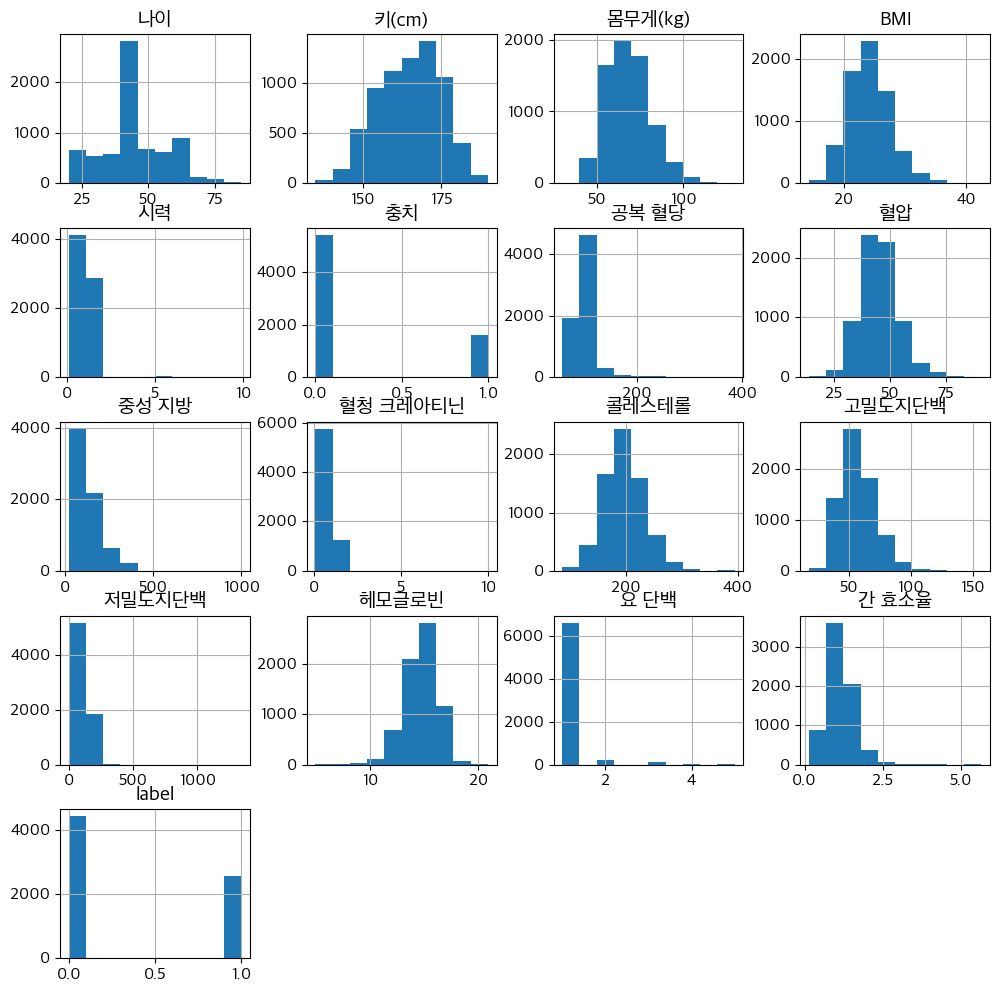

In [60]:
!pip install matplotlib
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Apple SD Gothic Neo'   # 한글 폰트 세팅
plt.rcParams['font.size'] = 12    # 폰트 크기
plt.rcParams['axes.unicode_minus'] = False    # 유니코드가 '-'기호로 설정되는 폰트가 깨지는 것을 방지
data.hist(figsize = (12,12))
plt.show()

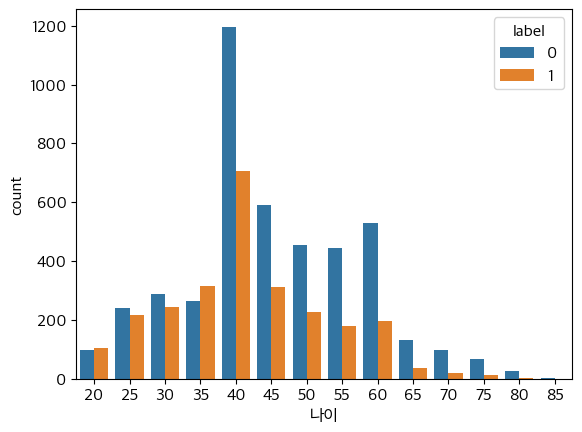

In [61]:
!pip install seaborn
import seaborn as sns
sns.countplot(x = '나이', hue = 'label', data = data)
plt.show()

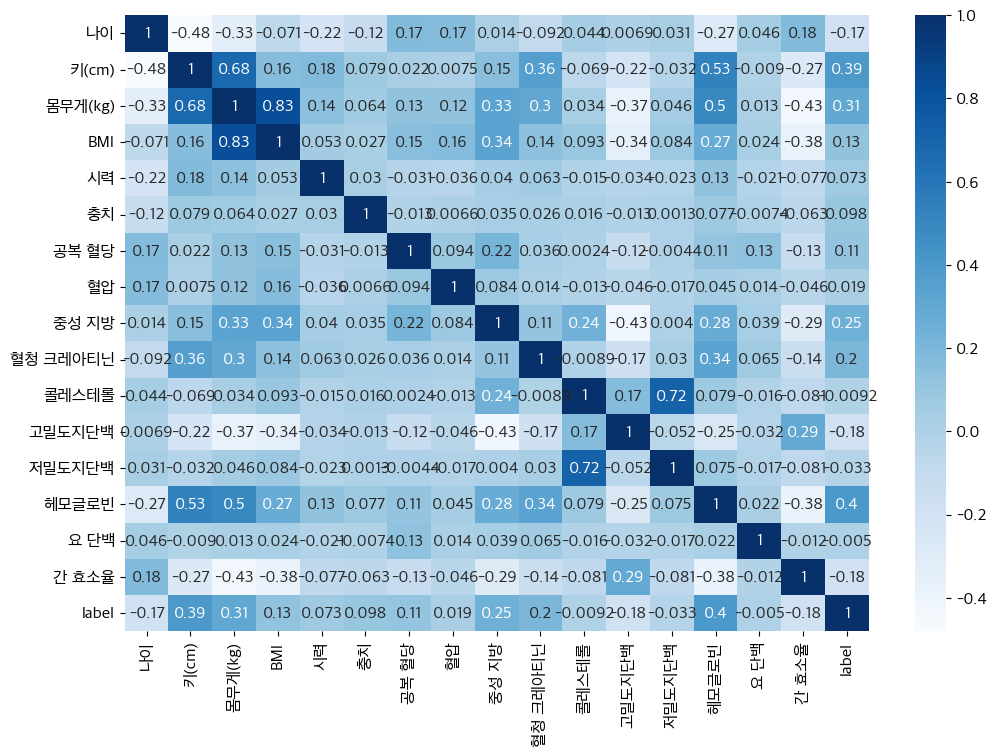

In [62]:
plt.figure(figsize = (12,8), dpi = 100)
sns.heatmap(data.drop('ID', axis = 1).corr(), annot = True, cmap = 'Blues')
plt.show()

In [63]:
#id, label빼고 상관관계 측정
from scipy.stats import pearsonr, spearmanr
results = []

for a in data.drop({'ID', 'label'}, axis = 1).columns:
    pair = data[[a,"label"]].dropna().copy()
    pair = pair.apply(pd.to_numeric)
    r, p = pearsonr(pair[a], pair["label"])
    rho, p2 = spearmanr(pair[a], pair["label"])
    results.append([a, r, p, rho, p2])

df_coff = pd.DataFrame(results, columns=['이름','pearson r', 'p value', 'spearman r', 'p value'])
df_coff.sort_values('pearson r', ascending=False)

#pearson 상관계수 - 선형관계일 때
#spearman 상관계수 - 비선형 관계일 때

    #제거해도 되는 것 from MI : 충치, 저밀도지단백, 나이, 콜레스테롤, 혈압, 시력, 공복혈당, 간 효소율
    #제거해도 되는 것 from pearson: 간 효소율, 고밀도지단백, 나이, 저밀도지단백, 콜레스테롤, 요 단백, 혈압, 충치
    #제거해도 되는 것 from feature importance: 간 효소율, 고밀도지단백, 나이, 저밀도지단백, 콜레스테롤, 요 단백
    #3 개다 포함되는건? 나이(3), 저밀도지단백(3),간 효소율(3), 충치(2), 혈압(2), 콜레스테롤(2)

,이름,pearson r,p value,spearman r,p value
13,헤모글로빈,0.402002,3.321253e-270,0.414942,1.678166e-289
1,키(cm),0.394669,1.205397e-259,0.400314,9.460852e-268
2,몸무게(kg),0.311503,2.396700e-157,0.328154,2.119559e-175
8,중성 지방,0.247918,1.552824e-98,0.252511,2.864160e-102
9,혈청 크레아티닌,0.197585,1.472581e-62,0.275094,9.066992e-122
3,BMI,0.126438,2.423867e-26,0.132428,9.297786e-29
6,공복 혈당,0.112261,4.486224e-21,0.106178,5.238338e-19
5,충치,0.098468,1.493128e-16,0.098468,1.493128e-16
4,시력,0.073323,8.158929e-10,0.119655,9.630763e-24
7,혈압,0.019119,1.097208e-01,0.028426,1.739175e-02


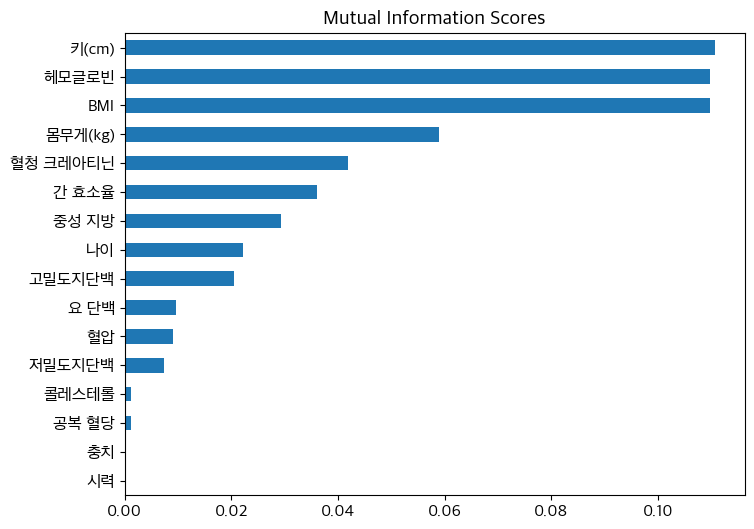

In [64]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd


X, y = data.drop(['ID', 'label'], axis = 1), data['label']
mi = mutual_info_regression(X, y)

mi_series = pd.Series(mi, index=X.columns)
mi_series.sort_values(ascending=False)

mi_series.sort_values().plot(kind = 'barh', figsize=(8,6))
plt.title("Mutual Information Scores")
plt.show()
#MI 두 변수 사이에 비선형 관계까지 포함한 의존성을 측정하는 값
#제거해도 되는 것 from MI : 충치, 저밀도지단백, 나이, 콜레스테롤, 혈압, 시력, 공복혈당, 간 효소율

In [68]:
!pip install autogluon.tabular
from autogluon.tabular import TabularDataset, TabularPredictor
train = TabularDataset("train.csv")
label_col = "label"

Loaded data from: train.csv | Columns = 18 / 18 | Rows = 7000 -> 7000


<Axes: >

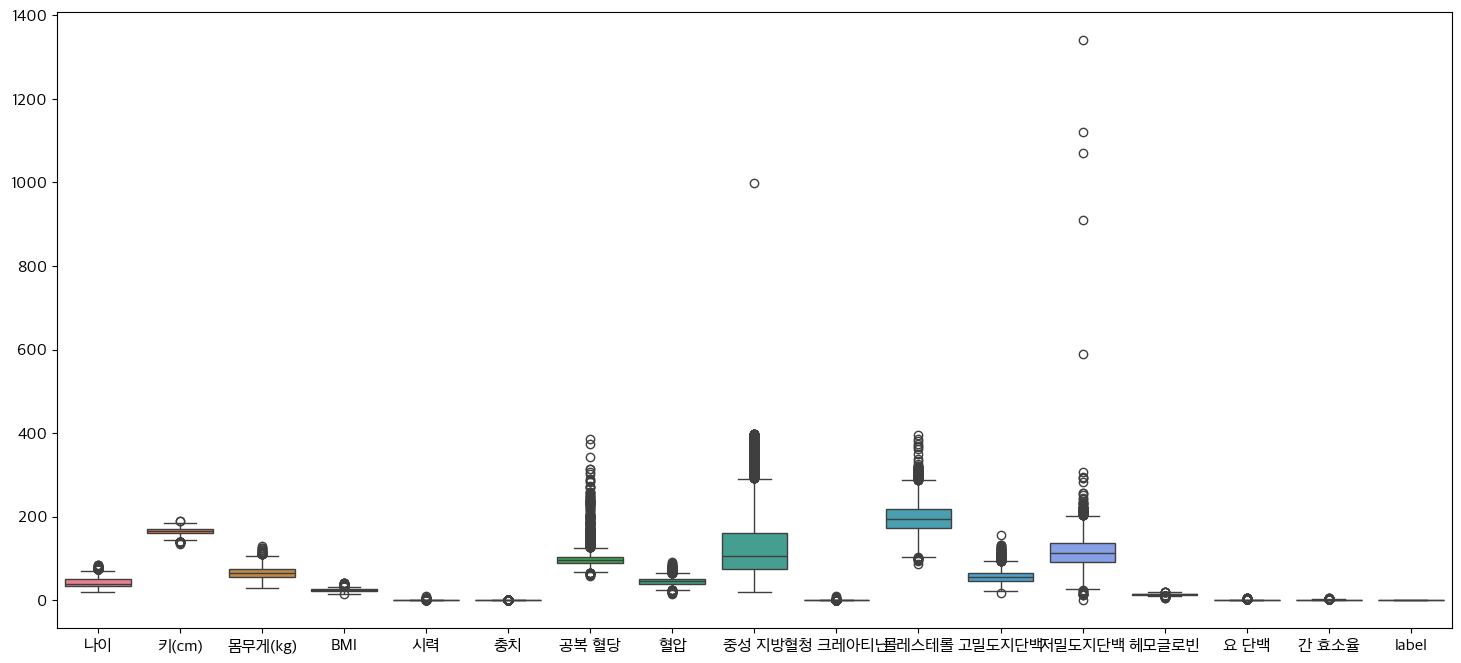

In [69]:
plt.figure(figsize=(18, 8))
import numpy as np
import seaborn as sns
sns.boxplot(train)
#차원 축소는 피쳐가 50개 이상일 때! (PCA)
#out lier 걱정될 때는?

In [70]:
import pandas as pd

# 숫자형 컬럼만 대상으로 하는 게 보통 좋음
num_cols = X.select_dtypes(include="number").columns

# 처음에는 전부 True인 마스크 (모든 행을 살려두고 시작)
mask = pd.Series(True, index=X.index)

for col in num_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR  # down 보단 lower가 보통 네이밍

    # 해당 컬럼에서만 유효한 값
    col_mask = (X[col] >= lower) & (X[col] <= upper)

    # 전체 마스크에 AND로 누적
    mask &= col_mask

# 루프 다 돈 뒤에 한 번만 필터링
X_clean = X[mask].copy()
y_clean = y[mask].copy()


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 1. 모델 + 스케일러 파이프라인 정의
model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])

# 2. 순차적 피처 선택 (Forward Selection)
sfs = SequentialFeatureSelector(
    estimator=model,          # 이 모델 성능으로 피처 선택
    n_features_to_select=5,   # 고를 피처 개수
    direction="forward",      # 하나씩 추가해 나가는 방식
    cv=5,                     # 5폴드 교차검증으로 성능 평가
    n_jobs=-1                 # 코어 여러 개 있으면 병렬 처리
)

# 3. 피처 선택 실행 (X, y는 기존 데이터)
sfs.fit(X, y)

# 4. 선택된 피처 확인
selected_mask = sfs.get_support()          # True/False 마스크
selected_features = X.columns[selected_mask]

print("선택된 피처들:")
print(selected_features)

선택된 피처들:
Index(['키(cm)', '충치', '중성 지방', '저밀도지단백', '헤모글로빈'], dtype='object')


<Axes: >

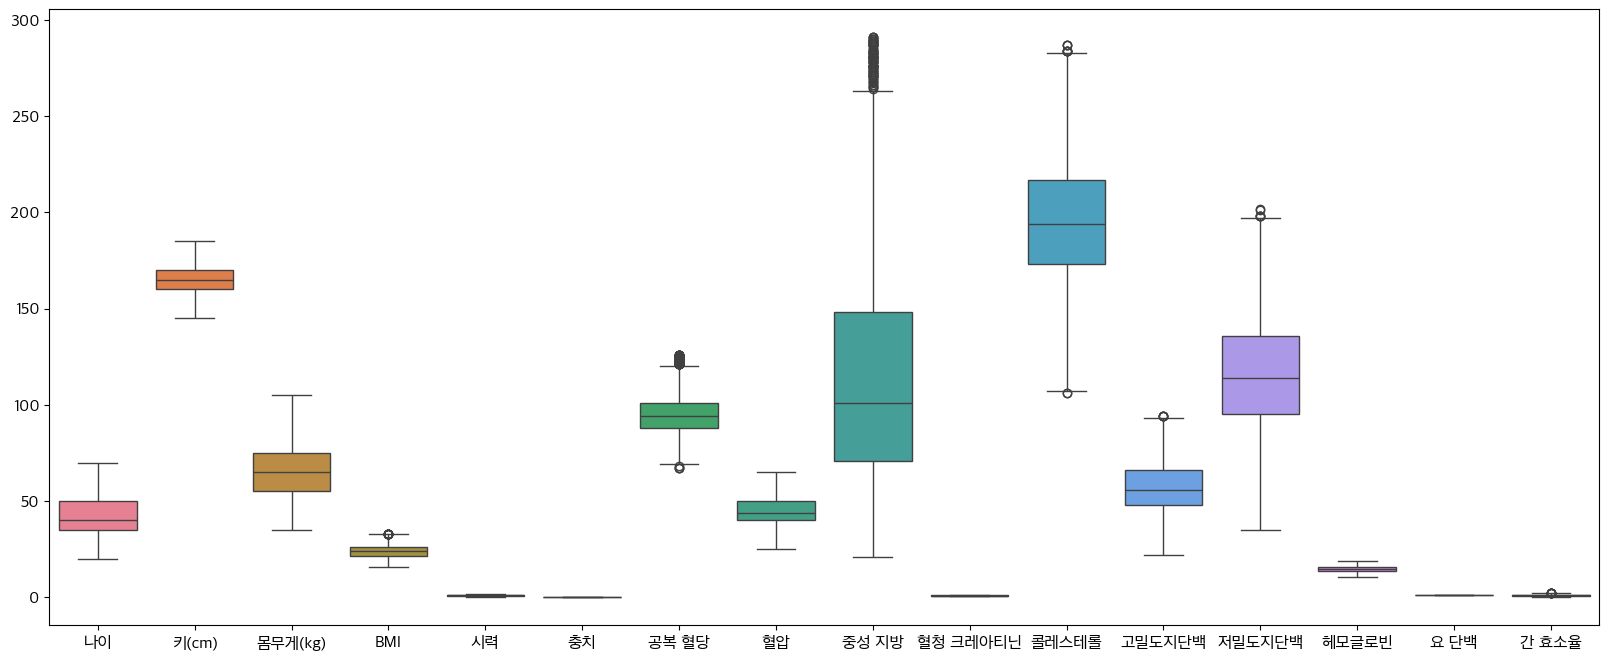

In [72]:
plt.figure(figsize=(20, 8))
sns.boxplot(X_clean)

In [73]:
from autogluon.tabular import TabularDataset, TabularPredictor
#요거는 건들지 마!@!@!

train.drop(['ID', 'BMI', '시력', '요 단백'], axis = 1, inplace=True) #inplace True 하면 train = train~~ 할 필요가 없어짐
#키 몸무게 제거 👉 LightGBM_BAG_L4    0.999571   0.767143    accuracy  
#BMI 제거 👉 CatBoost_BAG_L4    1.000000   0.771857    accuracy 
#BMI, 충치 제거 👉 ightGBM_BAG_L4    0.999857   0.766714    accuracy
#헤모글로빈 제거 👉 XGBoost_BAG_L4    0.993571   0.758143    accuracy 
#BMI, 시력 제거 👉 WeightedEnsemble_L5    0.995714   0.773857    accuracy
#BMI, 시력, 요 단백,  👉 WeightedEnsemble_L5    0.994429   0.776429    accuracy 
#BMI, 시력, 요 단백, 공복 혈당 👉 WeightedEnsemble_L2    0.948571   0.752000 accuracy
#BMI, 시력, 요 단백, 중성 지방 👉 LightGBM_BAG_L4	0.999571	0.774571	accuracy
#BMI, 시력, 요 단백, 저밀도지단백 👉 NeuralNetTorch_r79_BAG_L1	0.755000	0.742000	accuracy
#BMI, 시력, 요 단백, 콜레스테롤 👉 WeightedEnsemble_L5	0.994000	0.772857	accuracy
#BMI, 시력, 요 단백, 간 효소율 👉 WeightedEnsemble_L5	0.998429	0.772000	accuracy	
#BMI, 시력, 요 단백, 나이 👉 WeightedEnsemble_L5	0.998571	0.763714	accuracy

####요 아래부터 BMI, 시력, 요 단백 제거
#중성지방 outlier 처리 LightGBMXT_BAG_L4	0.986286	0.775507	accuracy

In [74]:
train

,나이,키(cm),몸무게(kg),충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,간 효소율,label
0,35,170,70,1,98,40,80,1.3,211,75,120,15.9,1.53,1
1,40,150,55,0,173,39,104,0.6,251,46,184,11.8,1.45,0
2,60,170,50,0,96,40,61,0.8,144,43,89,15.3,1.04,0
3,40,150,45,0,92,40,46,0.7,178,66,110,13.4,1.18,0
4,55,155,65,0,87,42,95,0.9,232,62,151,13.8,1.32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,25,170,65,0,87,45,141,1.2,184,44,112,14.9,1.50,0
6996,60,165,65,0,87,45,82,0.9,184,64,103,14.3,1.47,1
6997,40,180,100,0,97,44,87,0.9,178,54,107,15.6,1.00,0
6998,60,150,55,0,89,57,161,0.6,157,49,76,14.4,1.00,0


In [75]:
predictor = TabularPredictor(
    label=label_col, eval_metric='accuracy', problem_type='binary').fit(
    train_data=train,
    time_limit=300,
    num_stack_levels = 4,
    presets="best_quality",
)

No path specified. Models will be saved in: "AutogluonModels/ag-20251208_013016"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.10.18
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 25.1.0: Mon Oct 20 19:32:41 PDT 2025; root:xnu-12377.41.6~2/RELEASE_ARM64_T6000
CPU Count:          10
Memory Avail:       4.33 GB / 16.00 GB (27.0%)
Disk Space Avail:   262.61 GB / 460.43 GB (57.0%)
Presets specified: ['best_quality']


ValueError: Unknown `.fit` keyword argument specified: 'feature_prune'
Valid kwargs: ['ag_args', 'ag_args_ensemble', 'ag_args_fit', 'auto_stack', 'calibrate', 'delay_bag_sets', 'ds_args', 'excluded_model_types', 'feature_generator', 'feature_prune_kwargs', 'holdout_frac', 'hyperparameter_tune_kwargs', 'included_model_types', 'keep_only_best', 'learning_curves', 'name_suffix', 'num_bag_folds', 'num_bag_sets', 'num_stack_levels', 'pseudo_data', 'raise_on_model_failure', 'raise_on_no_models_fitted', 'refit_full', 'save_bag_folds', 'save_space', 'set_best_to_refit_full', 'test_data', 'unlabeled_data', 'use_bag_holdout', 'verbosity']

In [48]:
leaderboard = predictor.leaderboard(train, silent=True)
print(leaderboard)

                          model  score_test  score_val eval_metric  \
0       RandomForestEntr_BAG_L1    0.999714   0.709857    accuracy   
1         ExtraTreesEntr_BAG_L1    0.999714   0.713571    accuracy   
2         ExtraTreesGini_BAG_L1    0.999714   0.715571    accuracy   
3       RandomForestGini_BAG_L1    0.999714   0.710571    accuracy   
4     NeuralNetTorch_r79_BAG_L2    0.973143   0.735714    accuracy   
5               CatBoost_BAG_L3    0.969429   0.745571    accuracy   
6        NeuralNetFastAI_BAG_L2    0.967571   0.735286    accuracy   
7       RandomForestGini_BAG_L2    0.967286   0.731571    accuracy   
8          CatBoost_r177_BAG_L2    0.964714   0.740000    accuracy   
9          CatBoost_r177_BAG_L3    0.962857   0.747714    accuracy   
10          WeightedEnsemble_L4    0.962857   0.747714    accuracy   
11              CatBoost_BAG_L2    0.962286   0.740429    accuracy   
12          WeightedEnsemble_L3    0.962286   0.740429    accuracy   
13         CatBoost_

In [49]:
pd.DataFrame(leaderboard)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestEntr_BAG_L1,0.999714,0.709857,accuracy,0.102560,0.153615,0.438112,0.102560,0.153615,0.438112,1,True,2
1,ExtraTreesEntr_BAG_L1,0.999714,0.713571,accuracy,0.125023,0.170684,0.434083,0.125023,0.170684,0.434083,1,True,5
2,ExtraTreesGini_BAG_L1,0.999714,0.715571,accuracy,0.125891,0.176706,0.414883,0.125891,0.176706,0.414883,1,True,4
3,RandomForestGini_BAG_L1,0.999714,0.710571,accuracy,0.140617,0.153622,0.467940,0.140617,0.153622,0.467940,1,True,1
4,NeuralNetTorch_r79_BAG_L2,0.973143,0.735714,accuracy,2.338784,1.037095,56.392154,0.219250,0.071600,14.837824,2,True,20
5,CatBoost_BAG_L3,0.969429,0.745571,accuracy,3.374735,1.839410,80.156085,0.015432,0.005135,2.583180,3,True,24
6,NeuralNetFastAI_BAG_L2,0.967571,0.735286,accuracy,2.521350,1.039650,47.259486,0.401816,0.074156,5.705156,2,True,17
7,RandomForestGini_BAG_L2,0.967286,0.731571,accuracy,2.207100,1.115853,42.208311,0.087566,0.150359,0.653981,2,True,12
8,CatBoost_r177_BAG_L2,0.964714,0.740000,accuracy,2.138835,0.982119,43.858726,0.019301,0.016625,2.304396,2,True,19
9,CatBoost_r177_BAG_L3,0.962857,0.747714,accuracy,3.378370,1.839673,80.440391,0.019067,0.005399,2.867486,3,True,29


In [477]:
model_name = "WeightedEnsemble_L6"

test_X = pd.read_csv('test.csv')

y_pred = predictor.predict(
    test_X,          
    model=model_name
)
y_pred

0       0
1       0
2       1
3       1
4       0
       ..
2995    0
2996    0
2997    0
2998    1
2999    0
Name: label, Length: 3000, dtype: int64

In [478]:
pd.DataFrame(y_pred)

,label
0,0
1,0
2,1
3,1
4,0
...,...
2995,0
2996,0
2997,0
2998,1


In [479]:
submit = pd.read_csv('sample_submission.csv')
submit['label'] = y_pred
submit.head()

,ID,label
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,1
3,TEST_0003,1
4,TEST_0004,0


In [480]:
submit.to_csv('submission14.csv', index = False)